## Dataset Overview
This dataset pertains to a home loan approval process. The goal is to automate loan eligibility assessment based on applicant details provided in online application forms.

## Problem Statement
Identify customer segments eligible for loans to enable targeted marketing.

## Task Type
Classification: Predict loan approval status (approved or not approved).

## Key Features
- **Demographic**: Gender, Marital Status, Education, Number of Dependents
- **Financial**: Income (Applicant and Co-applicant), Loan Amount, Loan Term
- **Other**: Credit History, Property Area

## Dataset Attributes
| Variable | Description |
|----------|-------------|
| Loan_ID | Unique identifier |
| Gender | Male / Female |
| Married | Yes / No |
| Dependents | Number of dependents |
| Education | Graduate / Under Graduate |
| Self_Employed | Yes / No |
| ApplicantIncome | Income of the applicant |
| CoapplicantIncome | Income of the co-applicant |
| LoanAmount | Requested loan amount (in thousands) |
| Loan_Amount_Term | Loan term in months |
| Credit_History | Meets guidelines (1) or not (0) |
| Property_Area | Urban / Semi-Urban / Rural |
| Loan_Status | Approved (Y) / Not Approved (N) |

## Data Exploration and Preprocessing

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To display the ploy below code and not in new window
%matplotlib inline

In [2]:
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv('/users/onkar/Python/Loan Prediction Dataset.csv')

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [5]:
# Finding and counting null values in each column of the DataFrame
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Fill missing values in numerical columns with their respective means
# LoanAmount column
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

# Loan_Amount_Term column
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

# Credit_History column
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [7]:
# Fill missing values in specified categorical columns with their respective modes
categorical_columns = ['Gender','Married','Dependents','Self_Employed']

for category in categorical_columns:
    # Fill missing values with the mode (most frequent value) of each column
    df[category] = df[category].fillna(df[category].mode()[0])

In [8]:
# All null values replaced
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

In [9]:
# Set plot style for better aesthetics
sns.set_style("whitegrid")

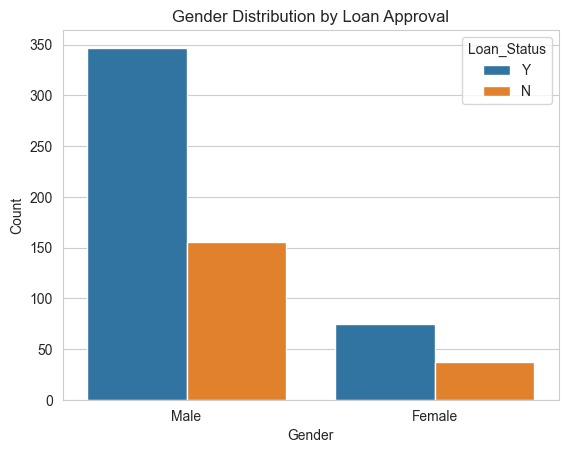

In [10]:
# Create a count plot to show the distribution of gender, split by Loan Status
sns.countplot(data=df, x='Gender', hue='Loan_Status')

# Add title and labels
plt.title('Gender Distribution by Loan Approval')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

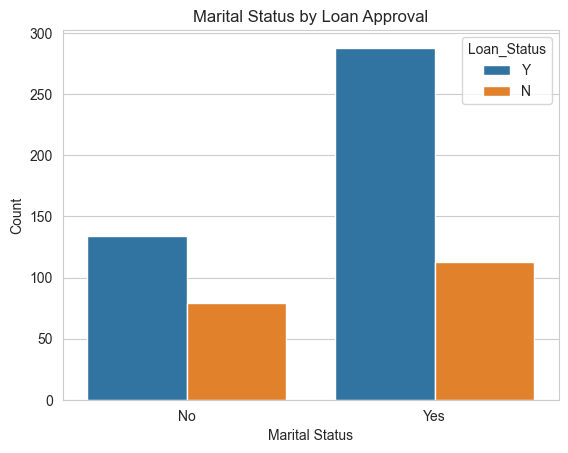

In [11]:
# Create a count plot to show the distribution of marital status, split by Loan Status
sns.countplot(data=df, x='Married', hue='Loan_Status')

# Add title and labels
plt.title('Marital Status by Loan Approval')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Display the plot
plt.show()

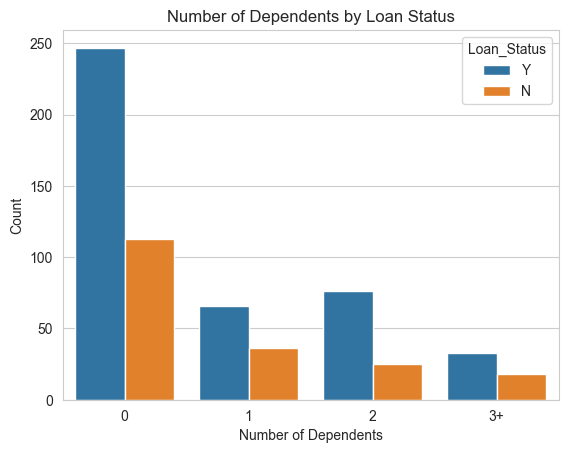

In [12]:
# Create a count plot to show the distribution of number of dependents, split by Loan Status
sns.countplot(data=df, x='Dependents', hue='Loan_Status')

# Add title and labels
plt.title('Number of Dependents by Loan Status')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')

# Display the plot
plt.show()

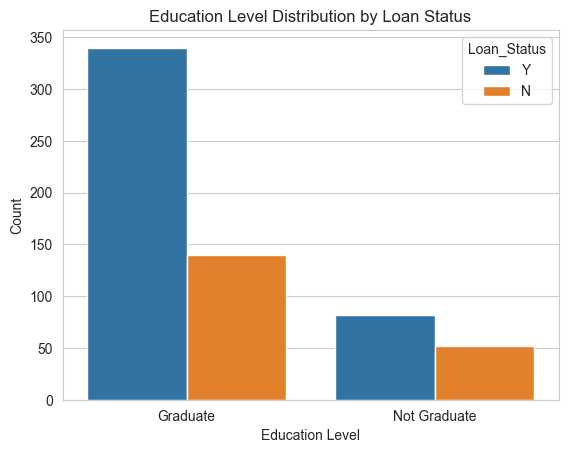

In [13]:
# Create a count plot to show the distribution of Education level, split by Loan Status
sns.countplot(data=df, x='Education', hue='Loan_Status')

# Add title and labels
plt.title('Education Level Distribution by Loan Status')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Display the plot
plt.show()

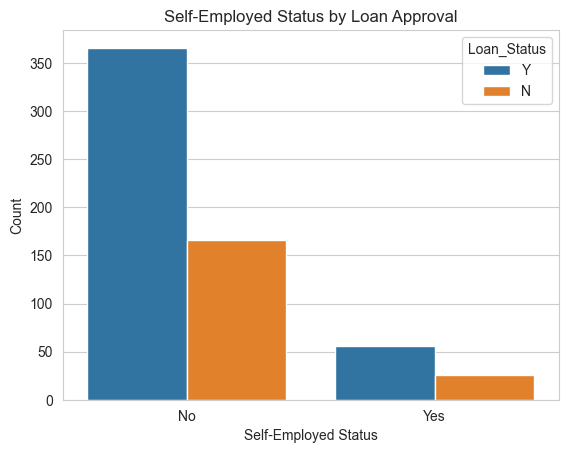

In [14]:
# Create a count plot to show the distribution of Self-Employed status, split by Loan Status
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')

# Add title and labels
plt.title('Self-Employed Status by Loan Approval')
plt.xlabel('Self-Employed Status')
plt.ylabel('Count')

# Display the plot
plt.show()

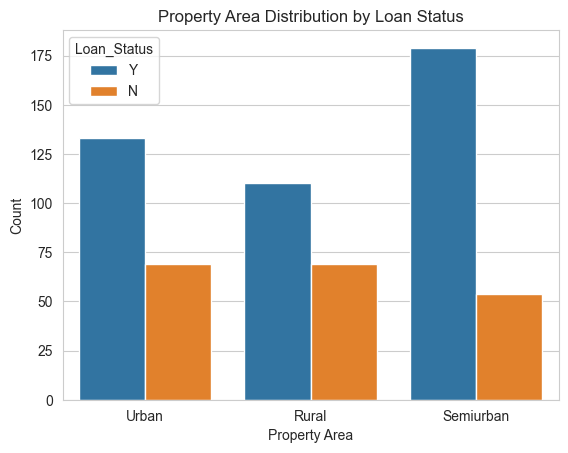

In [15]:
# Create a count plot to show the frequency of each property area, split by Loan Status
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')

# Add labels and title
plt.title('Property Area Distribution by Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Count')

# Display the plot
plt.show()


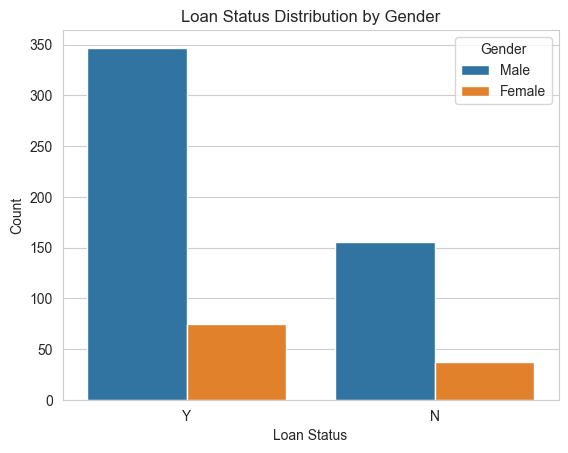

In [16]:
# Create a count plot to show the frequency of each Loan Status, split by Gender
sns.countplot(data=df, x='Loan_Status', hue='Gender')

# Add labels and title for better context
plt.title('Loan Status Distribution by Gender')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Display the plot
plt.show()

## Creation of new attributes

In [17]:
# New attribute
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Log Transformation

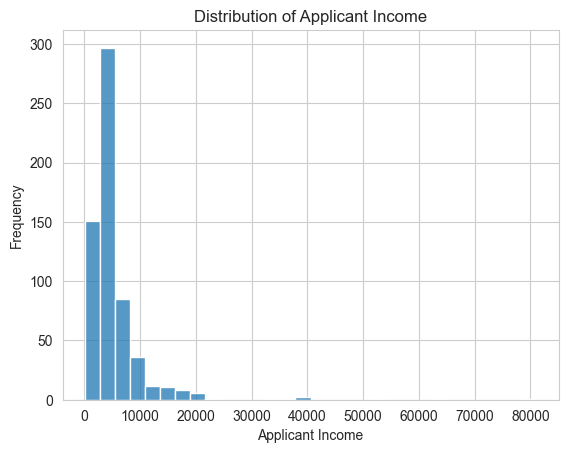

In [18]:
# Plotting a histogram for the 'ApplicantIncome' column from the DataFrame
sns.histplot(df['ApplicantIncome'], bins=30)  # Adjust bins as needed

# Adding title and axis labels
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

# Display the plot
plt.show()

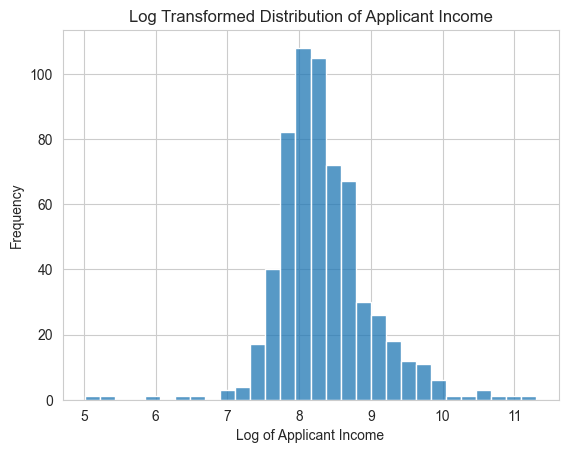

In [19]:
# Apply log transformation to the 'ApplicantIncome' attribute (handle any zeros or negatives by adding 1)
df['Applicant_Income_Log'] = np.log(df['ApplicantIncome'] + 1)

# Plot the transformed 'ApplicantIncome' to visualize the effect of log transformation
sns.histplot(df['Applicant_Income_Log'], bins=30)

# Add title and labels for better context
plt.title('Log Transformed Distribution of Applicant Income')
plt.xlabel('Log of Applicant Income')
plt.ylabel('Frequency')

# Display the plot
plt.show()

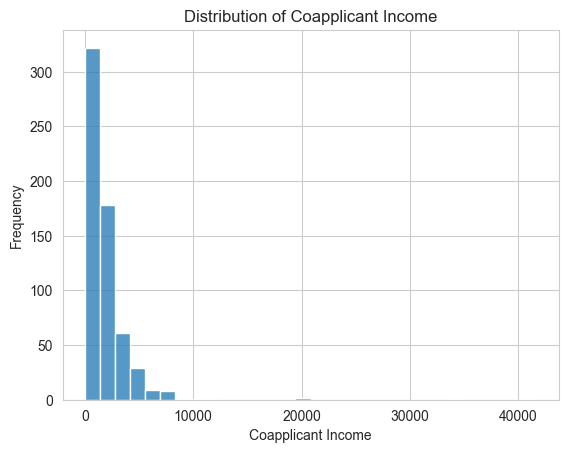

In [20]:
# Plot a histogram for the 'CoapplicantIncome' column from the DataFrame
sns.histplot(df['CoapplicantIncome'], bins=30)  # Adjust bins for clarity

# Add title and labels
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')

# Display the plot
plt.show()

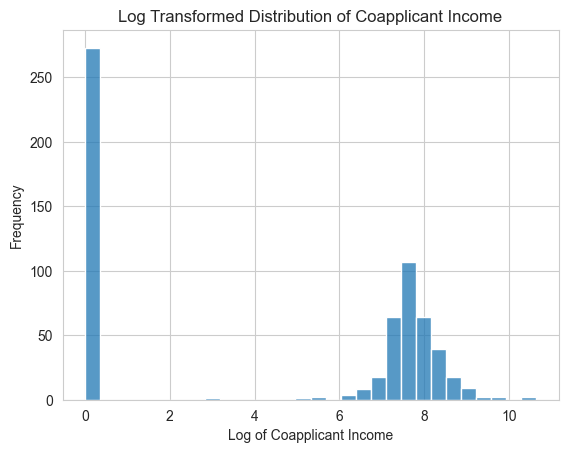

In [21]:
# Apply log transformation to 'CoapplicantIncome' (handling any zero values by adding 1)
df['Coapplicant_Income_Log'] = np.log(df['CoapplicantIncome'] + 1)

# Plot the log-transformed 'CoapplicantIncome' to visualize the effect of the transformation
sns.histplot(df['Coapplicant_Income_Log'], bins=30)

# Add title and labels for context
plt.title('Log Transformed Distribution of Coapplicant Income')
plt.xlabel('Log of Coapplicant Income')
plt.ylabel('Frequency')

# Display the plot
plt.show()

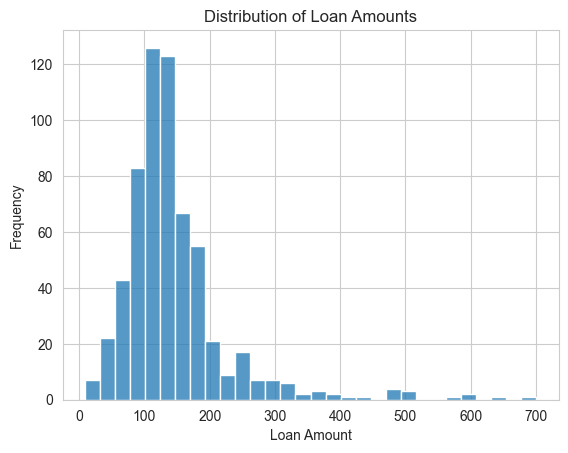

In [22]:
# Plot a histogram for the 'LoanAmounts' column from the DataFrame
sns.histplot(df['LoanAmount'], bins=30)

# Add title and labels for better context
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Display the plot
plt.show()

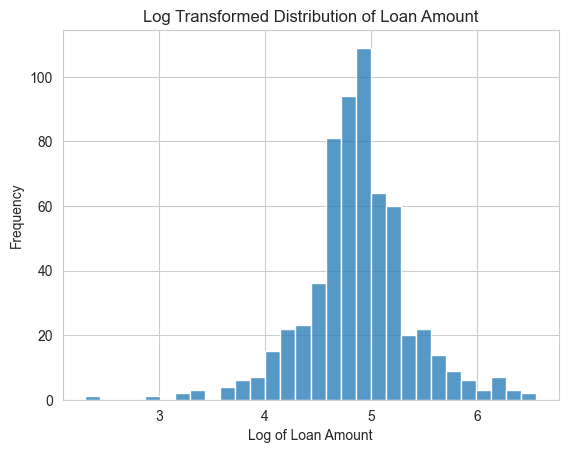

In [23]:
# Apply log transformation to 'LoanAmount' (handling any zero values by adding 1)
df['Loan_Amount_Log'] = np.log(df['LoanAmount'] + 1)

# Plot the log-transformed 'LoanAmount' to visualize the effect of the transformation
sns.histplot(df['Loan_Amount_Log'], bins=30)

# Add title and labels for better context
plt.title('Log Transformed Distribution of Loan Amount')
plt.xlabel('Log of Loan Amount')
plt.ylabel('Frequency')

# Display the plot
plt.show()

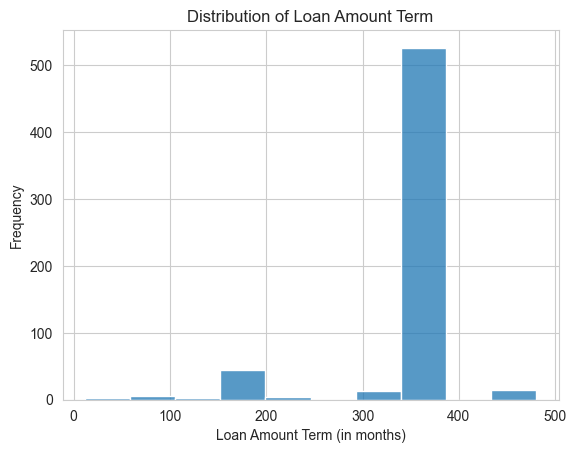

In [24]:
# Plot a histogram for the 'Loan_Amount_Term' column from the DataFrame
sns.histplot(df['Loan_Amount_Term'], bins=10)  # Adjust bins if needed

# Add title and labels for better context
plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term (in months)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

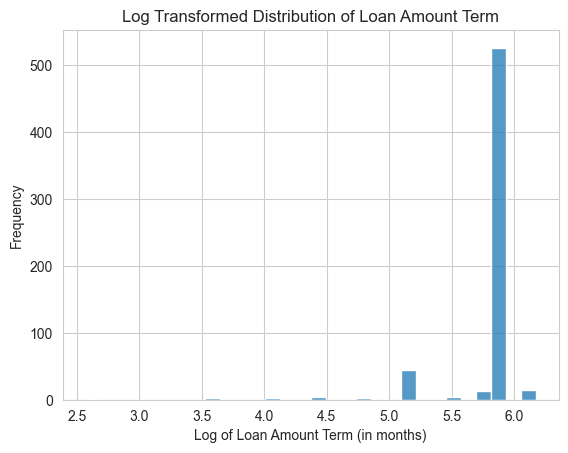

In [25]:
# Apply log transformation to 'LoanAmountTerm' (handle zero values by adding 1)
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'] + 1)

# Plot the log-transformed 'LoanAmountTerm' to visualize the effect of the transformation
sns.histplot(df['Loan_Amount_Term_Log'], bins=30)

# Add title and labels for better context
plt.title('Log Transformed Distribution of Loan Amount Term')
plt.xlabel('Log of Loan Amount Term (in months)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

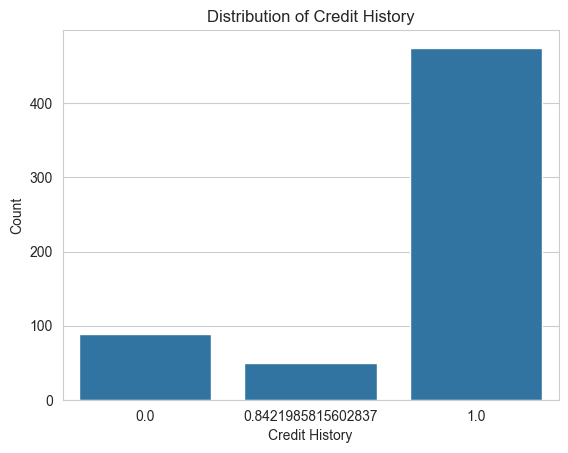

In [26]:
# Create a count plot for the 'Credit_History' column to show the frequency of each category
sns.countplot(data=df, x='Credit_History')

# Add title and labels for better context
plt.title('Distribution of Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')

# Display the plot
plt.show()

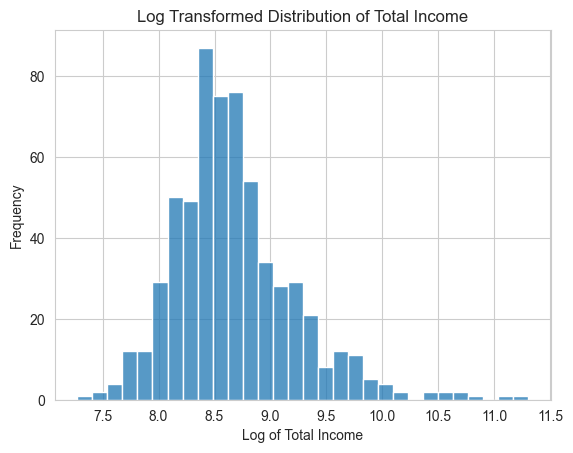

In [27]:
# Apply log transformation to 'Total_Income' (handling zero values by adding 1)
df['Total_Income_Log'] = np.log(df['Total_Income'] + 1)

# Plot the log-transformed 'Total_Income' to visualize the effect of the transformation
sns.histplot(df['Total_Income_Log'], bins=30)

# Add title and labels for better context
plt.title('Log Transformed Distribution of Total Income')
plt.xlabel('Log of Total Income')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Corelation Matrix

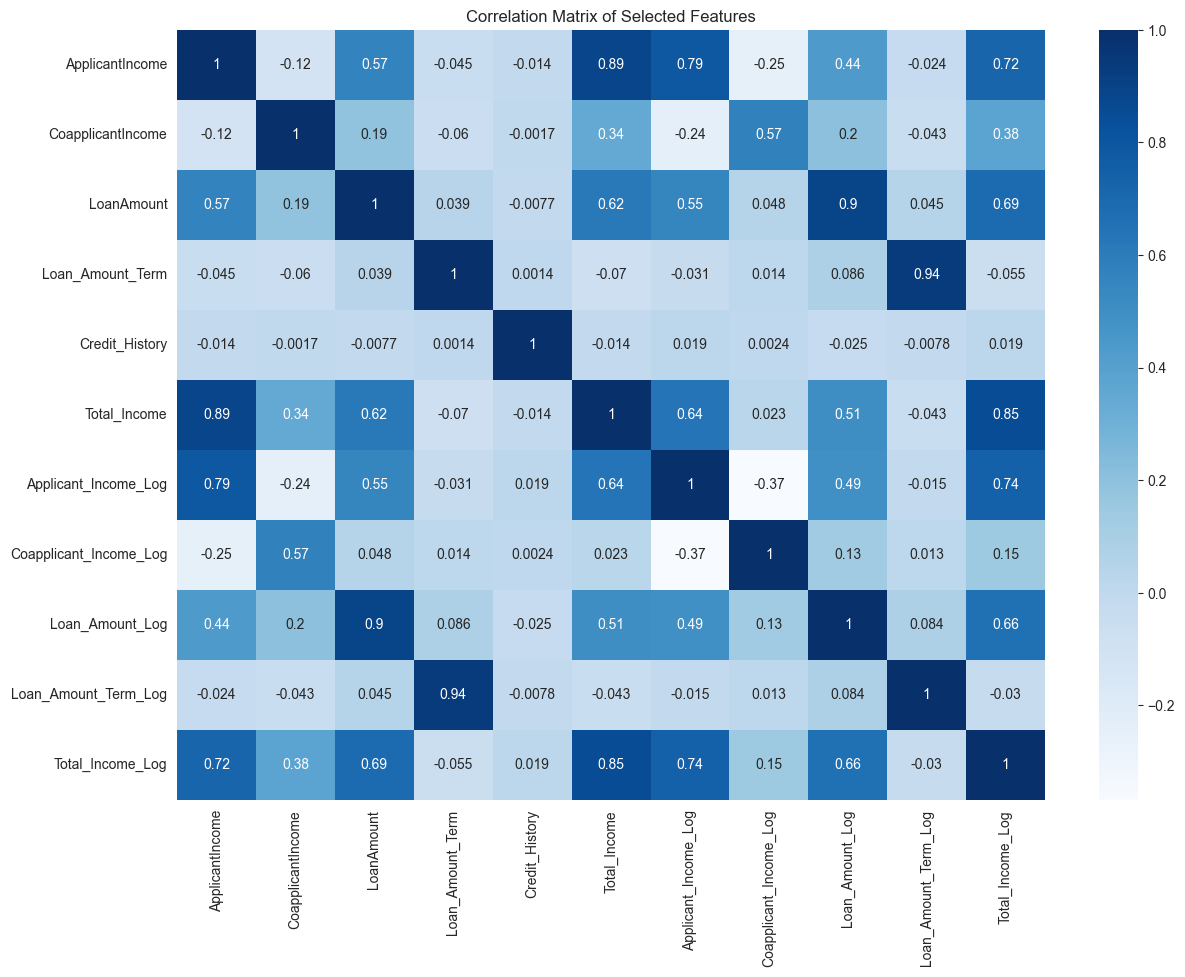

In [28]:
# Select the relevant columns for correlation analysis
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
        'Credit_History', 'Total_Income', 'Applicant_Income_Log', 'Coapplicant_Income_Log', 
        'Loan_Amount_Log', 'Loan_Amount_Term_Log', 'Total_Income_Log']

# Calculate the correlation matrix (consider excluding highly correlated pairs if needed)
corr = df[cols].corr()

# Set the figure size for the heatmap
plt.figure(figsize=(14, 10))

# Plot the heatmap with annotations and adjust the color map for better readability
sns.heatmap(corr, annot=True, cmap='Blues')

# Add a title for context
plt.title('Correlation Matrix of Selected Features')

# Display the plot
plt.show()

In [29]:
# Dropping unnecessary columns
drop_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_ID', 'Coapplicant_Income_Log']
df = df.drop(columns=drop_cols, axis=1)

# Check the shape of the updated DataFrame to ensure correct columns were dropped
print(f"Updated DataFrame shape: {df.shape}")

# Display the first few rows of the updated DataFrame
df.head()

Updated DataFrame shape: (614, 12)


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


## Label Encoding

In [30]:
# Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# List of columns that need to be label encoded
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Dependents']

# Apply label encoding to each of the columns in the list
for col in cols:
    if df[col].isnull().sum() == 0:  # Check if there are no missing values
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Column '{col}' contains missing values. Please handle missing values before encoding.")

# Display the first few rows of the updated DataFrame
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


## Train - Test Split

In [31]:
# Specify input and output attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

# Check for missing values in X and y
print(f"Missing values in input features (X): {x.isnull().sum().sum()}")
print(f"Missing values in output (y): {y.isnull().sum()}")

# Display the shape of the input and output attributes to verify
print(f"Input (X) shape: {x.shape}")
print(f"Output (y) shape: {y.shape}")

Missing values in input features (X): 0
Missing values in output (y): 0
Input (X) shape: (614, 11)
Output (y) shape: (614,)


## Model Training

In [32]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (25% test size, 75% train size)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting datasets to confirm the split
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (460, 11)
x_test shape: (154, 11)
y_train shape: (460,)
y_test shape: (154,)


In [33]:
from sklearn.model_selection import cross_val_score

def classify(model, x, y):
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Test set accuracy
    print('Accuracy is', model.score(x_test, y_test) * 100)
    
    # Cross-validation
    score = cross_val_score(model, x, y, cv=5)
    
    # Output individual cross-validation scores
    print('Cross-validation scores for each fold:', score)
    
    # Output mean cross-validation score
    print('Mean cross-validation is', np.mean(score) * 100)

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with an appropriate solver
model = LogisticRegression(solver='liblinear')

# Use the classify function to evaluate the model
classify(model, x, y)

Accuracy is 77.27272727272727
Cross-validation scores for each fold: [0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
Mean cross-validation is 80.78368652538984


## Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_predict = model.predict(x_test)

# Generate the confusion matrix
con_matrix = confusion_matrix(y_test, y_predict)

# Display the confusion matrix
print("Confusion Matrix:\n", con_matrix)

Confusion Matrix:
 [[21 33]
 [ 2 98]]


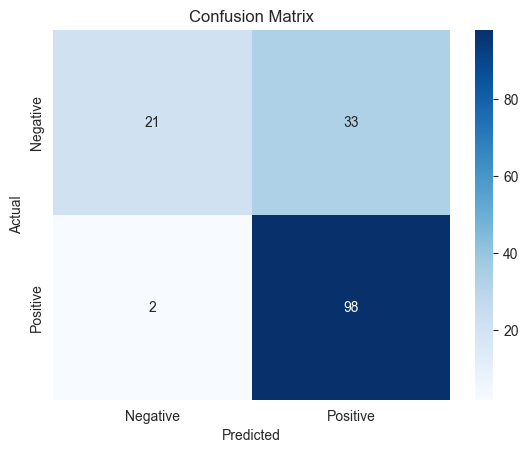

In [36]:
# Plot the confusion matrix using a heatmap
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion:

The loan eligibility prediction model achieved an accuracy of 77.27% on the test data. Cross-validation provided consistent results with a mean accuracy of 80.78%, demonstrating the model's robustness in predicting loan approval. This model can be used to automate loan eligibility assessment, streamlining the process and enabling more effective targeted marketing strategies.